### Before evaluation we will load the model that was trained on colab and make prediction on images

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO

In [5]:
model = YOLO(r".\runs\segment\train3\weights\best.pt")

In [7]:
# try with one test image
img = cv2.imread(r'..\..\data\test\images\00000474.png', cv2.IMREAD_COLOR)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [9]:
pred = model.predict(img)[0]

Ultralytics YOLOv8.0.49  Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258454 parameters, 0 gradients, 12.0 GFLOPs

0: 640x640 1 weapon, 19.0ms
Speed: 0.0ms preprocess, 19.0ms inference, 24.6ms postprocess per image at shape (1, 3, 640, 640)


In [10]:
boxes = pred.boxes  # Boxes object for bbox outputs
masks = pred.masks  # Masks object for segmenation masks outputs
probs = pred.probs 

In [11]:
# plot the predictions on the image
pred_plotted = pred.plot()
pred_plotted.shape

(800, 840, 3)

In [12]:
cv2.imshow('prediction', pred_plotted)
cv2.waitKey(0)
cv2.destroyAllWindows()

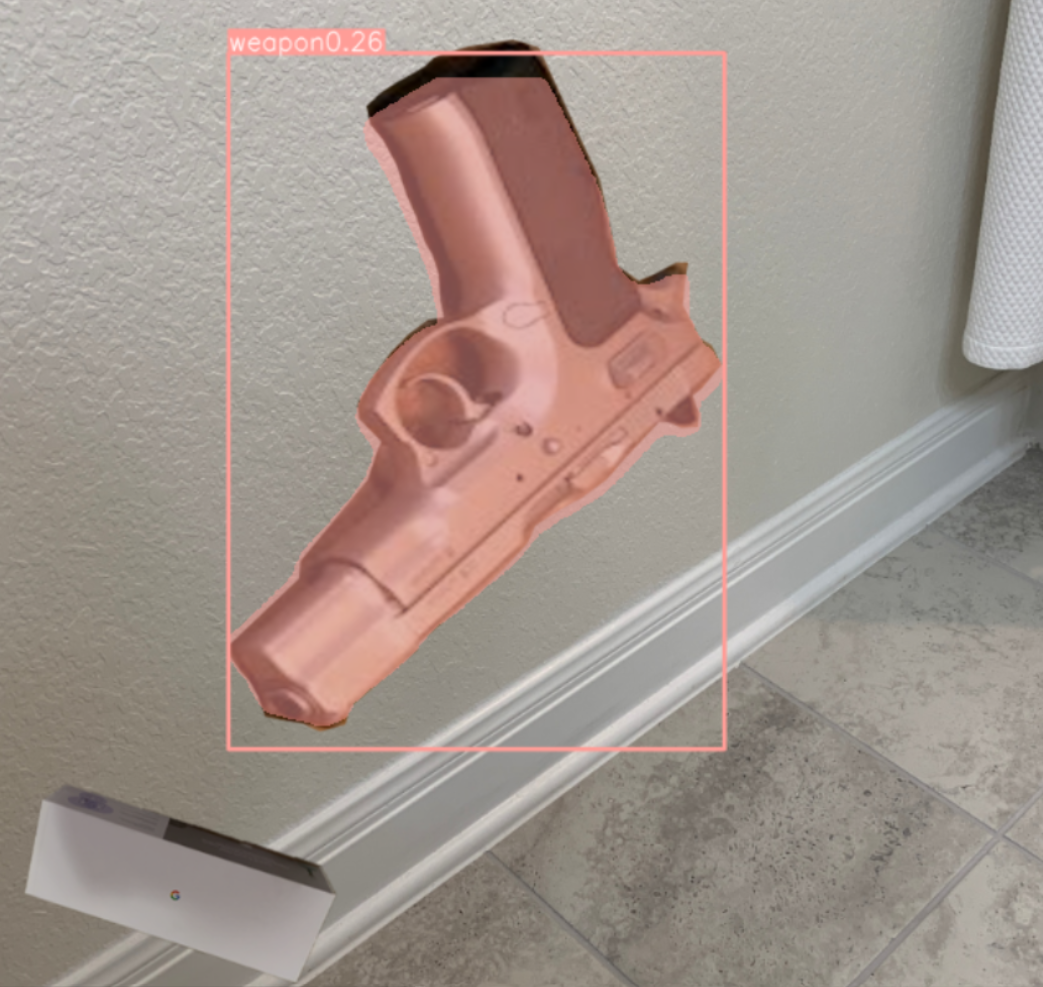

### great! Honestly I didn't expect this to give such decent results at first shot. LOL

# Let's evaluate the model

In [13]:
# Argumentents:-

# Name          Default Details

# data          None    path to data file, i.e. data.yaml
# imgsz         640     image size as scalar or (h, w) list, i.e. (640, 480)
# batch	        16      number of images per batch (-1 for AutoBatch)
# save_json     False   save results to JSON file
# save_hybrid   False   save hybrid version of labels (labels + additional predictions)
# conf          0.001   object confidence threshold for detection
# iou           0.6     intersection over union (IoU) threshold for NMS
# max_det       300     maximum number of detections per image
# half	        True	use half precision (FP16)
# device	    None	device to run on, i.e. cuda device=0/1/2/3 or device=cpu
# dnn	        False	use OpenCV DNN for ONNX inference
# plots	        False	show plots during training
# rect	        False	support rectangular evaluation
# split	        val	    dataset split to use for validation, i.e. 'val', 'test' or 'train'

In [18]:
metrics = model.val(
                    data="E:\Work\Data_Science\Projects\Custom_Object_Segmentation\data\data.yaml"
                    )

Ultralytics YOLOv8.0.49  Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
val: Scanning E:\Work\Data_Science\Projects\Custom_Object_Segmentation\data\valid\labels.cache... 10 images, 0 backgrou
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP
                   all         10         19      0.825      0.433        0.6      0.482      0.867      0.491       0.67      0.521
            non_weapon         10         12      0.723      0.437      0.631      0.543      0.734      0.463      0.635      0.577
                weapon         10          7      0.927      0.429      0.569      0.421          1      0.519      0.705      0.465
Speed: 0.7ms preprocess, 16.1ms inference, 0.0ms loss, 6.8ms postprocess per image
Results saved to runs\segment\val5


In [19]:
metrics.box.map    # map50-95

0.48193589010792925

In [20]:
metrics.box.map50  # map50

0.5997828581029517

In [21]:
metrics.box.map75  # map75

0.5436229123996731

In [22]:
metrics.box.maps   # a list contains map50-95 of each category

array([    0.54282,     0.42105])